# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
income_data[:10]

['Rich',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Poor',
 'Middle Class',
 'Poor',
 'Middle Class']

In [5]:
# Z -> N(0, 1)
# N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [6]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status' : income_data,
        'Height' : height,
        'Weight' : weight,
        'Age' : np.floor(age).astype(int), # Redondear a la baja y convertir a tipo int
        'Income' : income
    }
)

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,156.834413,62.547833,37,18065.393994
1,Male,Rich,148.754402,47.404240,23,19078.946983
2,Male,Middle Class,172.398496,78.413271,36,21124.086086
3,Female,Middle Class,195.311785,78.571820,38,19480.379252
4,Male,Middle Class,116.407183,113.730076,30,19916.708908


## Agrupación de datos

In [8]:
grouped_gender = data.groupby('Gender')

In [9]:
grouped_gender.groups

{'Female': [0, 3, 5, 6, 9, 10, 12, 16, 17, 21, 22, 23, 25, 26, 28, 29, 30, 32, 33, 34, 35, 37, 39, 40, 46, 48, 50, 51, 53, 54, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 83, 86, 89, 92, 94, 95, 97, 98, 100, 105, 107, 108, 110, 112, 113, 120, 121, 122, 123, 124, 127, 128, 129, 131, 137, 138, 141, 142, 143, 144, 145, 146, 147, 150, 153, 154, 155, 158, 159, 162, 163, 164, 165, 167, 169, 171, 173, 177, 178, 179, 180, ...], 'Male': [1, 2, 4, 7, 8, 11, 13, 14, 15, 18, 19, 20, 24, 27, 31, 36, 38, 41, 42, 43, 44, 45, 47, 49, 52, 55, 56, 62, 63, 67, 70, 75, 81, 82, 84, 85, 87, 88, 90, 91, 93, 96, 99, 101, 102, 103, 104, 106, 109, 111, 114, 115, 116, 117, 118, 119, 125, 126, 130, 132, 133, 134, 135, 136, 139, 140, 148, 149, 151, 152, 156, 157, 160, 161, 166, 168, 170, 172, 174, 175, 176, 181, 183, 186, 187, 189, 190, 191, 192, 193, 194, 197, 200, 203, 204, 205, 208, 211, 213, 214, ...]}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight  Age        Income
0    Female            Rich  156.834413   62.547833   37  18065.393994
3    Female    Middle Class  195.311785   78.571820   38  19480.379252
5    Female            Rich  130.801852   56.597648   32  21351.638141
6    Female            Poor  111.502708   53.020558   34  19844.093688
9    Female    Middle Class  163.112080   37.803268   24  18780.394302
..      ...             ...         ...         ...  ...           ...
490  Female            Rich  228.252640   70.693647   25  18471.420866
491  Female    Middle Class  158.297000   76.769716   27  19933.485311
495  Female    Middle Class  146.373903   55.493829   20  20406.382880
497  Female            Poor  136.645075  113.489048   44  20703.974498
499  Female            Rich  154.210170   72.147948   30  18239.184914

[266 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  Age        Income
1     Male            Rich  148.754402   4

In [11]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,156.834413,62.547833,37,18065.393994
3,Female,Middle Class,195.311785,78.571820,38,19480.379252
5,Female,Rich,130.801852,56.597648,32,21351.638141
6,Female,Poor,111.502708,53.020558,34,19844.093688
9,Female,Middle Class,163.112080,37.803268,24,18780.394302
...,...,...,...,...,...,...
490,Female,Rich,228.252640,70.693647,25,18471.420866
491,Female,Middle Class,158.297000,76.769716,27,19933.485311
495,Female,Middle Class,146.373903,55.493829,20,20406.382880
497,Female,Poor,136.645075,113.489048,44,20703.974498


In [12]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [13]:
len(double_group) # 6 grupos, para cada uno de los generos y para cada estado economico

6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
3    Female    Middle Class  195.311785  78.571820   38  19480.379252
9    Female    Middle Class  163.112080  37.803268   24  18780.394302
21   Female    Middle Class  202.603221  98.658698   30  18995.687479
23   Female    Middle Class  108.494820  51.192677   50  20066.472669
25   Female    Middle Class  121.027624  49.130366   29  18702.593483
..      ...             ...         ...        ...  ...           ...
482  Female    Middle Class  146.043857  52.702587   42  19661.833698
483  Female    Middle Class  173.567637  68.154513    3  20053.917394
484  Female    Middle Class  181.344362  65.073862   26  20246.051231
491  Female    Middle Class  158.297000  76.769716   27  19933.485311
495  Female    Middle Class  146.373903  55.493829   20  20406.382880

[97 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age        Income
6    Female         

## Operaciones sobre datos agrupados

In [15]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     15643.835287  6034.076906  2765  1.920122e+06
       Poor             13340.991002  5704.245697  2507  1.633212e+06
       Rich             13642.366686  5378.754613  2548  1.711806e+06
Male   Middle Class     14134.887249  5877.266172  2443  1.687334e+06
       Poor             12384.306333  4814.738865  2155  1.505986e+06
       Rich             11846.259534  4443.745349  2119  1.403647e+06

In [16]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.276652  62.206978  28.505155  19795.076953
       Poor             162.695012  69.563972  30.573171  19917.220657
       Rich             156.808812  61.824766  29.287356  19675.927550
Male   Middle Class     164.359154  68.340304  28.406977  19620.162559
       Poor             160.835147  62.529076  27.987013  19558.264106
       Rich             166.848726  62.587963  29.845070  19769.674437

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       97
        Poor               82
        Rich               87
Male    Middle Class       86
        Poor               77
        Rich               71
dtype: int64

In [18]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      97.0  161.276652  28.038665  95.684572  146.202056   
       Poor              82.0  162.695012  30.162306  98.926234  140.837047   
       Rich              87.0  156.808812  26.625662  98.556258  139.130369   
Male   Middle Class      86.0  164.359154  30.116085  96.704349  144.545097   
       Poor              77.0  160.835147  28.501333  76.137535  142.017508   
       Rich              71.0  166.848726  28.884576  97.386779  147.269019   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.213699  178.479926  236.327943   97.0  62.206978   
       Poor             163.597155  179.790845  243.774160   82.0  69.563972   
       Rich             154.210170  171.525125  228.252640   87.0  61.824766   
Male   Middle Class     164.100472  184.154279  228.704805   86.0  68.340304   
       Poor             160.976606  184.748352  214.471955   77.0  62.529076   
       Rich             169.250438  186.989035  239.947115   71.0  62.587963   

                        ...   Age       Income                             \
                        ...   75%   max  count          mean          std   
Gender Economic Status  ...                                                 
Female Middle Class     ...  36.0  64.0   97.0  19795.076953   897.983270   
       Poor             ...  38.0  58.0   82.0  19917.220657   948.120045   
       Rich             ...  37.0  63.0   87.0  19675.927550  1026.842662   
Male   Middle Class     ...  36.0  50.0   86.0  19620.162559  1004.356822   
       Poor             ...  37.0  58.0   77.0  19558.264106  1050.836143   
       Rich             ...  38.0  58.0   71.0  19769.674437  1136.954121   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class     18002.940404  19108.367556  19801.036799   
       Poor             18092.323280  19174.946480  19887.671373   
       Rich             18034.468618  18809.472667  19625.082825   
Male   Middle Class     18003.946216  18861.080441  19506.246929   
       Poor             18046.274619  18711.970314  19335.805234   
       Rich             18025.510484  18663.398199  19749.426937   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20617.898627  21496.647672  
       Poor             20752.019001  21493.471756  
       Rich             20603.247298  21382.036783  
Male   Middle Class     20476.162653  21441.862006  
       Poor             20340.925365  21477.428421  
       Rich             20921.336606  21455.034191  

[6 rows x 32 columns]

In [19]:
grouped_income = double_group['Income']

In [20]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      97.0  19795.076953   897.983270  18002.940404   
       Poor              82.0  19917.220657   948.120045  18092.323280   
       Rich              87.0  19675.927550  1026.842662  18034.468618   
Male   Middle Class      86.0  19620.162559  1004.356822  18003.946216   
       Poor              77.0  19558.264106  1050.836143  18046.274619   
       Rich              71.0  19769.674437  1136.954121  18025.510484   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19108.367556  19801.036799  20617.898627  21496.647672  
       Poor             19174.946480  19887.671373  20752.019001  21493.471756  
       Rich             18809.472667  19625.082825  20603.247298  21382.036783  
Male   Middle Class     18861.080441  19506.246929  20476.162653  21441.862006  
       Poor             18711.970314  19335.805234  20340.925365  21477.428421  
       Rich             18663.398199  19749.426937  20921.336606  21455.034191

In [21]:
double_group.aggregate(
    {
        'Income' : np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.920122e+06  28.505155  28.038665
       Poor             1.633212e+06  30.573171  30.162306
       Rich             1.711806e+06  29.287356  26.625662
Male   Middle Class     1.687334e+06  28.406977  30.116085
       Poor             1.505986e+06  27.987013  28.501333
       Rich             1.403647e+06  29.845070  28.884576

In [22]:
double_group.aggregate(
    {
        'Age' : np.mean,
        'Height' : lambda h: np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.505155  5.781818
       Poor             30.573171  5.427179
       Rich             29.287356  5.923528
Male   Middle Class     28.406977  5.489530
       Poor             27.987013  5.680079
       Rich             29.845070  5.817509

In [23]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15643.835287  161.276652  28.038665  6034.076906   
       Poor             13340.991002  162.695012  30.162306  5704.245697   
       Rich             13642.366686  156.808812  26.625662  5378.754613   
Male   Middle Class     14134.887249  164.359154  30.116085  5877.266172   
       Poor             12384.306333  160.835147  28.501333  4814.738865   
       Rich             11846.259534  166.848726  28.884576  4443.745349   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     62.206978  22.492991  2765  28.505155  11.225087   
       Poor             69.563972  19.937022  2507  30.573171  12.357864   
       Rich             61.824766  20.328944  2548  29.287356  11.965948   
Male   Middle Class     68.340304  23.966303  2443  28.406977  10.451432   
       Poor             62.529076  23.613537  2155  27.987013  11.328229   
       Rich             62.587963  25.614820  2119  29.845070  12.662259   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.920122e+06  19795.076953   897.983270  
       Poor             1.633212e+06  19917.220657   948.120045  
       Rich             1.711806e+06  19675.927550  1026.842662  
Male   Middle Class     1.687334e+06  19620.162559  1004.356822  
       Poor             1.505986e+06  19558.264106  1050.836143  
       Rich             1.403647e+06  19769.674437  1136.954121

In [24]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.781818  2.779983  2.552607  22.158441
       Poor             5.427179  3.510658  2.489210  21.136342
       Rich             5.923528  3.058849  2.461747  19.272662
Male   Middle Class     5.489530  2.868241  2.733940  19.649628
       Poor             5.680079  2.665382  2.486756  18.734145
       Rich             5.817509  2.460819  2.373786  17.512040

## Filtrado de datos

In [25]:
double_group['Age'].filter(lambda x: x.sum() > 2400)

0      37
2      36
3      38
4      30
5      32
       ..
491    27
494    40
495    20
497    44
499    30
Name: Age, Length: 352, dtype: int32

## Transformación de variables

In [26]:
zscore = lambda x: (x - x.mean())/x.std()

In [27]:
z_group = double_group.transform(zscore)

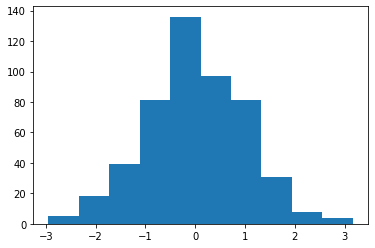

In [28]:
plt.hist(z_group['Age'])
plt.show()

In [29]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [30]:
double_group.transform(fill_na_mean) # En el caso de que hubiera algun NA

,Height,Weight,Age,Income
0,156.834413,62.547833,37,18065.393994
1,148.754402,47.404240,23,19078.946983
2,172.398496,78.413271,36,21124.086086
3,195.311785,78.571820,38,19480.379252
4,116.407183,113.730076,30,19916.708908
...,...,...,...,...
495,146.373903,55.493829,20,20406.382880
496,206.076334,54.432906,42,19084.580146
497,136.645075,113.489048,44,20703.974498
498,162.307461,61.102436,20,18504.031915


## Operaciones diversas muy útiles

In [31]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,156.834413,62.547833,37,18065.393994
1,Male,Rich,148.754402,47.404240,23,19078.946983
2,Male,Middle Class,172.398496,78.413271,36,21124.086086
3,Female,Middle Class,195.311785,78.571820,38,19480.379252
6,Female,Poor,111.502708,53.020558,34,19844.093688
8,Male,Poor,202.520167,88.093595,21,21242.187773


In [32]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
494,Male,Middle Class,207.926734,45.208622,40,21368.891824
495,Female,Middle Class,146.373903,55.493829,20,20406.382880
496,Male,Poor,206.076334,54.432906,42,19084.580146
497,Female,Poor,136.645075,113.489048,44,20703.974498
498,Male,Rich,162.307461,61.102436,20,18504.031915
499,Female,Rich,154.210170,72.147948,30,18239.184914


In [33]:
double_group.nth(32)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     143.464775  47.734829   19  21288.927453
       Poor             185.376574  74.594992   46  21072.332507
       Rich             210.657045  63.213276   25  19890.471020
Male   Middle Class     154.854994  30.811599   28  18199.815207
       Poor             149.724120  33.817771   25  18247.763133
       Rich              97.386779  50.202557   34  20180.235851

In [34]:
double_group.nth(77)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     184.567623  61.959698   27  19669.002817
       Poor             146.869992  54.694520   40  19150.525657
       Rich             164.315311  44.928204   14  18956.947694
Male   Middle Class     180.935069  62.532502   26  19398.209197

In [35]:
data_sorted = data.sort_values(['Age', 'Income'])

In [36]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
128,Female,Rich,160.310712,89.110723,-6,20154.744246
63,Male,Middle Class,148.107606,13.591848,-1,21110.789147
456,Female,Poor,243.774160,68.608893,0,18607.959373
273,Male,Rich,129.358980,62.069029,0,21408.557970
229,Female,Rich,121.146912,81.276564,1,20117.363014
402,Male,Poor,145.400152,74.541305,3,19097.067842
483,Female,Middle Class,173.567637,68.154513,3,20053.917394
139,Male,Rich,179.918120,77.371725,4,20967.835291
261,Female,Middle Class,118.827336,63.936562,5,19162.158584
130,Male,Middle Class,182.898125,70.747840,5,19907.558934


In [37]:
age_grouped = data_sorted.groupby('Gender')

In [38]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
128,Female,Rich,160.310712,89.110723,-6,20154.744246
63,Male,Middle Class,148.107606,13.591848,-1,21110.789147


In [39]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
319,Male,Rich,213.725687,32.350071,58,18659.363548
284,Female,Middle Class,181.751777,74.751527,64,20207.149246


## Conjunto de entrenamiento y conjunto de testing

In [40]:
mainpath = '../../datasets/'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)

In [41]:
data = pd.read_csv(fullpath)

In [42]:
len(data)

3333

## Dividir utilizando la distribución normal

In [43]:
a = np.random.randn(len(data))

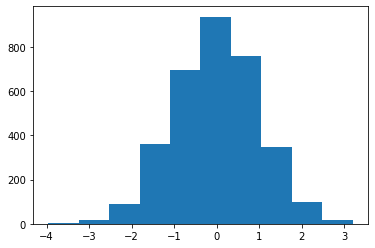

In [44]:
plt.hist(a)
plt.show()

In [45]:
check = (a < 0.75)

In [46]:
check

array([ True,  True,  True, ..., False,  True,  True])

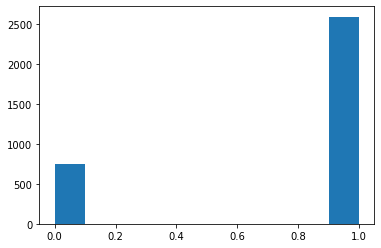

In [47]:
plt.hist(check.astype(int))
plt.show()

In [48]:
training = data[check]
testing = data[~check]

In [49]:
len(training)

2589

In [50]:
len(testing)

744

## Otra forma, con la librería sklearn

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(data, test_size = 0.2)

In [53]:
len(train)

2666

In [54]:
len(test)

667

## Usando una función de shuffle

In [55]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [56]:
from sklearn.utils import shuffle

In [57]:
data = shuffle(data)

In [58]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [59]:
len(train_data)

2499

In [60]:
len(test_data)

834